In [1]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import functional as F

In [2]:
def load_model():
    weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    model=fasterrcnn_resnet50_fpn_v2(weights=weights,box_score_thres=0.7)
    model.eval()
    return model, weights.meta["categories"]

In [3]:
def process_image(image_path):
    image=Image.open(image_path).convert('RGB')
    image_tensor=F.to_tensor(image)
    
    return image,image_tensor

In [4]:
def perform_detection(model,image_tensor):
    with torch.no_grad():
        prediction=model([image_tensor])
        
    print("Model Output")
    print(prediction)  #it has boxes, confidence score and label name
    
    return prediction[0]

In [5]:
def visualize_detections(image, prediction, category_names):
    
    image_np = np.array(image)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    boxes = prediction['boxes'].cpu().numpy().astype(np.int32)
    scores = prediction['scores'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()

    image_with_boxes = image_np.copy()

    color_map = {}

    for box, score, label in zip(boxes, scores, labels):
        if label not in color_map:
            color_map[label] = (
                np.random.randint(0, 255),
                np.random.randint(0, 255),
                np.random.randint(0, 255)
            )
        color = color_map[label]

        cv2.rectangle(
            image_with_boxes,
            (box[0], box[1]),
            (box[2], box[3]),
            color,
            2
        )

        label_text = f"{category_names[label]}: {score:.2f}"

        text_size, baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

        cv2.rectangle(
            image_with_boxes,
            (box[0], box[1] - text_size[1] - 5),
            (box[0] + text_size[0], box[1]),
            color,
            -1
        )

        cv2.putText(
            image_with_boxes,
            label_text,
            (box[0], box[1] - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 255, 255),
            1,
            cv2.LINE_AA
        )

    image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

    return image_with_boxes

In [6]:
def main(image_path):
    
    model, categories = load_model()
    print(f"Model loaded with {len(categories)} categories")

    image, image_tensor = process_image(image_path)

    prediction = perform_detection(model, image_tensor)

    num_detections = len(prediction['boxes'])
    print(f"Detected {num_detections} objects")

    result_image = visualize_detections(image, prediction, categories)

    plt.figure(figsize=(12, 8))
    plt.imshow(result_image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    print("\nDetection Details:")
    for i in range(num_detections):
        box = prediction['boxes'][i].cpu().numpy().astype(np.int32)
        score = prediction['scores'][i].cpu().numpy()
        label = prediction['labels'][i].cpu().numpy()
        print(f"Object {i+1}: {categories[label]}, Score: {score:.2f}, Box: {box}")

    return result_image

Model loaded with 91 categories
Model Output
[{'boxes': tensor([[330.1998, 151.9150, 444.7536, 329.1410],
        [543.8488,  78.3059, 614.8928, 253.9395],
        [ 42.9907, 144.2270, 329.0358, 341.6943],
        [529.4786, 162.9321, 676.5869, 319.7227],
        [427.0075, 147.8680, 551.5932, 314.5001],
        [230.4286,  87.7914, 296.6168, 183.1018],
        [251.6252, 140.1236, 402.8335, 328.6169],
        [231.1641,  87.6181, 298.5496, 282.6173],
        [191.5213, 142.4533, 360.4057, 336.4305],
        [529.1563, 204.3650, 566.9815, 305.7922],
        [320.6765, 144.3289, 402.5363, 294.4596],
        [321.3883, 141.1516, 400.6121, 220.5287],
        [527.9464, 172.2636, 608.4946, 311.9697],
        [207.4572, 100.9810, 322.7721, 311.8995],
        [432.9117, 179.5221, 499.4922, 310.8232],
        [363.4485, 148.0907, 489.3658, 321.3539],
        [552.5259, 198.3619, 630.9231, 318.8060],
        [582.0436, 162.2849, 677.6439, 247.5935],
        [242.0342, 176.6285, 339.1443, 335.3

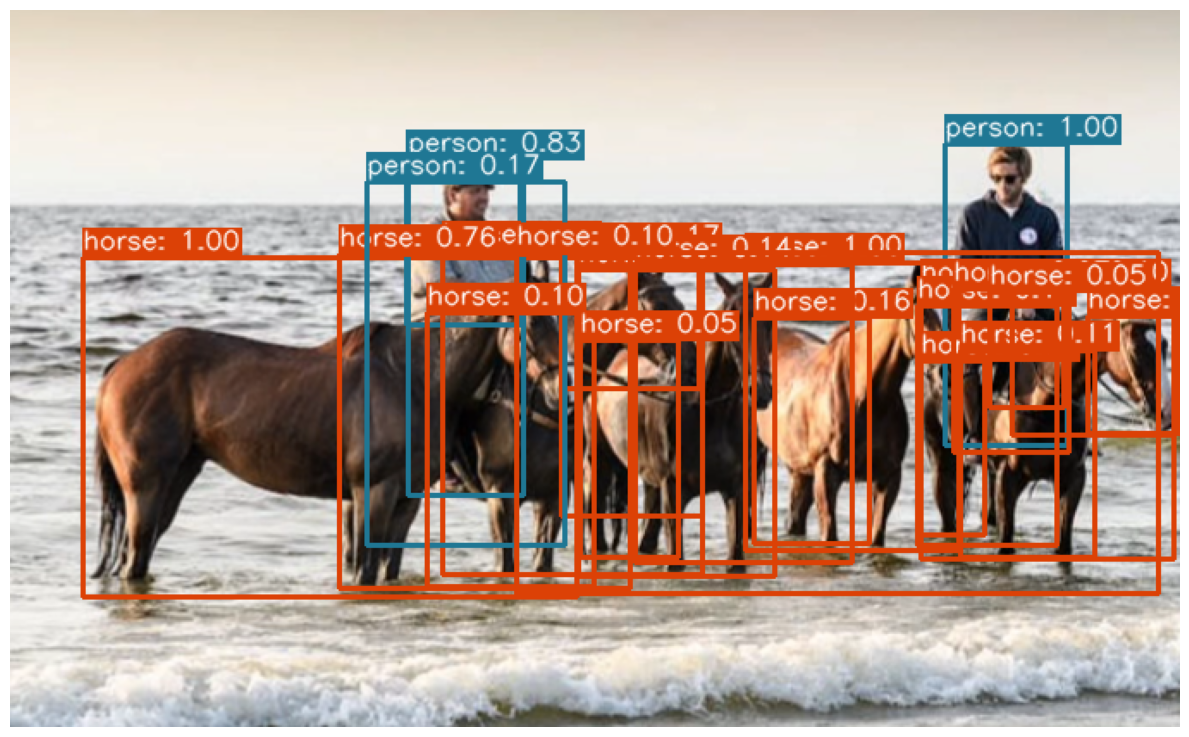


Detection Details:
Object 1: horse, Score: 1.00, Box: [330 151 444 329]
Object 2: person, Score: 1.00, Box: [543  78 614 253]
Object 3: horse, Score: 1.00, Box: [ 42 144 329 341]
Object 4: horse, Score: 1.00, Box: [529 162 676 319]
Object 5: horse, Score: 1.00, Box: [427 147 551 314]
Object 6: person, Score: 0.99, Box: [230  87 296 183]
Object 7: horse, Score: 0.98, Box: [251 140 402 328]
Object 8: person, Score: 0.83, Box: [231  87 298 282]
Object 9: horse, Score: 0.76, Box: [191 142 360 336]
Object 10: horse, Score: 0.71, Box: [529 204 566 305]
Object 11: horse, Score: 0.42, Box: [320 144 402 294]
Object 12: horse, Score: 0.17, Box: [321 141 400 220]
Object 13: horse, Score: 0.17, Box: [527 172 608 311]
Object 14: person, Score: 0.17, Box: [207 100 322 311]
Object 15: horse, Score: 0.16, Box: [432 179 499 310]
Object 16: horse, Score: 0.14, Box: [363 148 489 321]
Object 17: horse, Score: 0.11, Box: [552 198 630 318]
Object 18: horse, Score: 0.10, Box: [582 162 677 247]
Object 19: ho

In [8]:
image_path="image.jpg"
results=main(image_path)